In [1]:
# util functions
def findMaxElementIndex(data) :
    return data.index(max(data))

def prepareList(data) :
    myList = []
    for i in range(len(data)) :
        if(i == findMaxElementIndex(data)):
            myList.append(0.2)
        else:
            myList.append(0)
    return myList


In [2]:
# Dependencies and Setup
# check data_clean.py to clean data
%matplotlib inline

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as stats
import json
import datetime 
from pandas import Timestamp
# from datetime import timedelta

file_to_load = "./angeles_parking/parking-2018.csv"

#Read Purchasing File and store into Pandas data frame
data_tickets = pd.read_csv(file_to_load)
data_tickets.head(2)

/Users/vinay/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,4320468924,2018-01-13T00:00:00,26.0,NaN,NaN,CA,201801.0,NaN,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06
1,4320468935,2018-01-13T00:00:00,27.0,NaN,NaN,CA,201801.0,NaN,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06


In [3]:
# no rows has Issue Date as na
# print(data_tickets['Issue Date'].isna().sum())

# (Basically convert the NA/NAn on ceros at the column Issue Date )
# we want to inherit the time and finance analytics
data_tickets['Issue Date'].fillna(0, inplace=True)
data_tickets['Fine amount'].fillna(0, inplace=True)

In [4]:
data_tickets.count()

Ticket number            1998779
Issue Date               1998779
Issue time               1998247
Meter Id                  467146
Marked Time                62605
RP State Plate           1998779
Plate Expiry Date        1804836
VIN                            0
Make                     1996926
Body Style               1996533
Color                    1997856
Location                 1998685
Route                    1983361
Agency                   1998775
Violation code           1998779
Violation Description    1998510
Fine amount              1998779
Latitude                 1998777
Longitude                1998777
dtype: int64

In [5]:
# preparing issue month to find montly analytics
data_tickets["Issue Month"] = data_tickets["Issue Date"].str.split(pat="-").str[1]
# data_tickets_2018["Issue Month"] = data_tickets_2018["Issue Date"].str.split(pat="T").str[0]
data_tickets.head(2)

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Issue Month
0,4320468924,2018-01-13T00:00:00,26.0,NaN,NaN,CA,201801.0,NaN,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,01
1,4320468935,2018-01-13T00:00:00,27.0,NaN,NaN,CA,201801.0,NaN,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,01


In [6]:
data_tickets_groupby_month = data_tickets.groupby("Issue Month")

data_tickets_groupby_month_tickets_result = pd.DataFrame(data_tickets_groupby_month["Ticket number"].count())
# number of tickets each month
data_tickets_groupby_month_tickets_result["Percentage"] = 100*data_tickets_groupby_month_tickets_result["Ticket number"]/data_tickets_groupby_month_tickets_result["Ticket number"].sum()
data_tickets_groupby_month_tickets_result

,Ticket number,Percentage
Issue Month,,
01,188094,9.410445
02,166428,8.326483
03,193242,9.668002
04,189197,9.465629
05,182154,9.113264
06,167759,8.393074
07,148981,7.453600
08,170190,8.514698
09,141813,7.094981


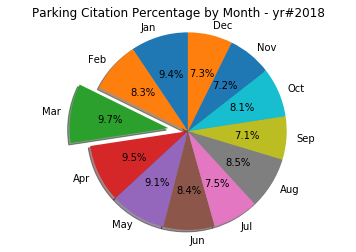

In [7]:
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sizes = data_tickets_groupby_month_tickets_result["Percentage"]
percentageList = []
for k, v in sizes.iteritems():
    percentageList.append(v)
explode = prepareList(percentageList)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Parking Citation Percentage by Month - yr#2018")
plt.savefig("Parking Citation Percentage by Month - yr#2018.png")
plt.show()

In [8]:
# get most tickets per car maker
data_tickets_groupby_make = data_tickets.groupby("Make")
data_tickets_groupby_make_tickets = pd.DataFrame(data_tickets_groupby_make["Ticket number"].count())
data_tickets_groupby_make_tickets_result = pd.DataFrame(data_tickets_groupby_make_tickets.nlargest(10, "Ticket number"))

# find % of tickets
data_tickets_groupby_make_tickets_result["Percentage"] = 100*data_tickets_groupby_make_tickets_result["Ticket number"]/data_tickets_groupby_make_tickets_result["Ticket number"].sum()
data_tickets_groupby_make_tickets_result


,Ticket number,Percentage
Make,,
TOYT,331524,24.085052
HOND,228764,16.619590
FORD,169911,12.343949
NISS,149992,10.896844
CHEV,136733,9.933584
BMW,90103,6.545938
MERZ,80783,5.868844
HYUN,65094,4.729046
VOLK,64339,4.674196


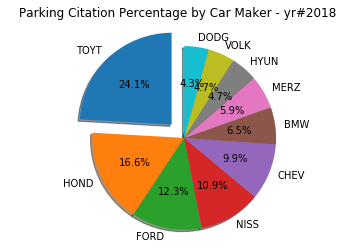

In [9]:
makerList = []
ticketNumberPer = []
for k, v in data_tickets_groupby_make_tickets_result["Percentage"].iteritems():
    makerList.append(k)
    ticketNumberPer.append(v)

    
# pic and save >>>>
labels = makerList
sizes = ticketNumberPer
explode = prepareList(ticketNumberPer)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Parking Citation Percentage by Car Maker - yr#2018")
plt.savefig("Parking Citation Percentage by Car Maker - yr#2018.png")
plt.show()

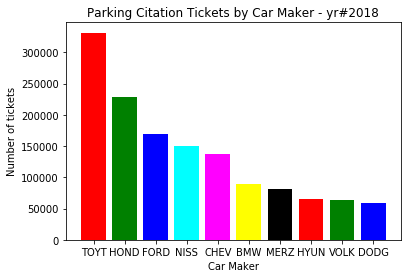

In [11]:
makerList = []
ticketNumber = []
for k, v in data_tickets_groupby_make_tickets_result["Ticket number"].iteritems():
    makerList.append(k)
    ticketNumber.append(v)

x = makerList
energy = ticketNumber

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color=['red', 'green', 'blue', 'cyan','magenta','yellow','black'])
plt.xlabel("Car Maker")
plt.ylabel("Number of tickets")
plt.title("Parking Citation Tickets by Car Maker - yr#2018")

plt.xticks(x_pos, x)
plt.savefig("Parking Citation Tickets by Car Maker - yr#2018.png")
plt.show()

In [22]:
# get popular Violation during the year
data_tickets_groupby_vilation = data_tickets.groupby("Violation Description")
data_tickets_groupby_vilation_tickets = pd.DataFrame(data_tickets_groupby_vilation["Violation Description"].count())
data_tickets_groupby_vilation_tickets_result = pd.DataFrame(data_tickets_groupby_vilation_tickets.nlargest(10, "Violation Description"))
data_tickets_groupby_vilation_tickets_result["Percentage"] = 100*data_tickets_groupby_vilation_tickets_result["Violation Description"]/data_tickets_groupby_vilation_tickets_result["Violation Description"].sum()
data_tickets_groupby_vilation_tickets_result


,Violation Description,Percentage
Violation Description,,
NO PARK/STREET CLEAN,594546,36.926396
METER EXP.,292067,18.139861
RED ZONE,166944,10.368652
PREFERENTIAL PARKING,143105,8.888046
DISPLAY OF TABS,123414,7.665066
NO PARKING,92234,5.728521
PARKED OVER TIME LIMIT,62677,3.892778
DISPLAY OF PLATES,58525,3.634904
WHITE ZONE,40722,2.529185


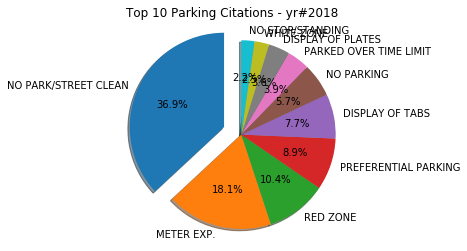

In [23]:
violation = []
ticketNumberPer = []
for k, v in data_tickets_groupby_vilation_tickets_result["Percentage"].iteritems():
    violation.append(k)
    ticketNumberPer.append(v)

    
# pic and save >>>>
labels = violation
sizes = ticketNumberPer
explode = prepareList(ticketNumberPer)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Top 10 Parking Citations - yr#2018")
plt.savefig("Top 10 Parking Citations - yr#2018.png")
plt.show()

In [24]:
data_tickets.head(2)

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Issue Month
0,4320468924,2018-01-13T00:00:00,26.0,NaN,NaN,CA,201801.0,NaN,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,1998779,NO PARKING,73.0,6.499186e+06,1.866284e+06,01
1,4320468935,2018-01-13T00:00:00,27.0,NaN,NaN,CA,201801.0,NaN,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,1998779,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,01
